**Clustering**:

Clustering is an unsupervised learning process. It is a data analysis technique used to group a set of objects or data points into clusters according to how similar they are. The main goal is to ensure that items in the same cluster are more alike than those in other clusters. This similarity can be based on various attributes or features of the data. It is used for several important purposes:

1- Data Exploration: It helps in discovering patterns and structures within data, making it easier to understand the underlying relationships.

2- Dimensionality Reduction: : By grouping related things into clusters, data can be made simpler, which can aid in visualization or reducing complexity in machine learning models.

3- Recommendation Systems: Clustering helps in finding similar items or users, improving recommendations in systems like e-commerce or streaming services.

It is an effective technique for organizing and analyzing complex data, making it easier to uncover insights and patterns without needing pre-established labels or categories. It’s essential to carefully choose the clustering method and parameters to achieve meaningful results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

df = pd.read_csv("The_Processed_data.csv")
print(df.head())

   Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  Diastolic BP  \
0           0         241     1    1             0     0.755556          0.56   
1           1         455     2    1             1     0.833333          0.66   
2           2         247     2    0             1     0.933333          0.78   
3           3        1468     1    1             1     0.811111          0.80   
4           4         972     1    1             1     0.011111          0.56   

    Heart Rate  Diabetes  Family History  Smoking  Diet  Continent  \
0     0.457143         0               0        1     0          5   
1     0.828571         1               1        1     2          4   
2     0.457143         1               0        0     1          3   
3     0.471429         1               1        1     0          4   
4     0.757143         1               1        1     2          1   

   Heart Attack Risk  
0                  0  
1                  0  
2                  1  


First, we removed the class label before clustering.
 For different reasons :

 1- Nature of clustering: because clustering is unsupervised learning.

  2- Focus on Feature Relationships: clustering algorithms analyze the relationships and distances between data points based on their features. And other reasons. Then we scale the features with a standard scaler. We use a standard scaler when features have different units or scales, as it ensures that no feature's scale dominates the others. Standard scaling leads to better model performance clustering.

In [ ]:
# Extract features (excluding the target variable)
features = df.drop('Heart Attack Risk', axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\n Scaled DataFrame:")
print(scaled_df.head())


 Scaled DataFrame:
   Unnamed: 0  Patient ID       Age       Sex   Cholesterol  Systolic BP  \
0   -1.731618   -1.522906  0.201549  0.659723     -1.772076     0.874913   
1   -1.730752   -1.337576  1.463205  0.659723     -0.205600     1.139754   
2   -1.729886   -1.517710  1.463205 -1.515787     -0.205600     1.480265   
3   -1.729020   -0.460293  0.201549  0.659723     -0.205600     1.064085   
4   -1.728154   -0.889841  0.201549  0.659723     -0.205600    -1.659997   

   Diastolic BP   Heart Rate  Diabetes  Family History   Smoking      Diet  \
0      0.188003    -0.143661 -1.376356       -0.982159  0.342973 -1.227402   
1      0.527297     1.133001  0.726556        1.018165  0.342973  1.237260   
2      0.934450    -0.143661  0.726556       -0.982159 -2.915680  0.004929   
3      1.002309    -0.094559  0.726556        1.018165  0.342973 -1.227402   
4      0.188003     0.887489  0.726556        1.018165  0.342973  1.237260   

   Continent  
0   1.614332  
1   0.984164  
2   0.353

**K-means Clustering**
K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct clusters based on their similarities. It assigns each data point to the nearest cluster centroid and iteratively updates the centroids to minimize the within-cluster sum of squared distances.

**Silhouette method**
The Silhouette method measures how well each data point fits within its assigned cluster compared to neighboring clusters. The Silhouette score ranges from -1 to 1, with higher scores indicating better-defined and well-separated clusters.

**The Calinski-Harabasz Index**
The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, considers both the within-cluster dispersion and the between-cluster dispersion to evaluate the clustering, where a higher Calinski-Harabasz Index indicates better clustering, as it suggests that the clusters are well-separated (high between-cluster variance) and compact (low within-cluster variance).

both these methods are useful for determining the optimal number of clusters (k) in a dataset, where they measure rhe clustering quality, such that the Silhouette Score focuses on the fit of individual data points to their assigned clusters, while the Calinski-Harabasz Index evaluates the overall quality of the clustering solution based on the balance of within-cluster and between-cluster variances.




In [ ]:
# Evaluate K-means with different values of K
k_values = range(2, 11)  # Test K from 2 to 10 that’s mean more than 3 times
silhouette_scores = []
calinski_harabasz_scores = []
wss_values = []  # To hold Within-cluster Sum of Squares
# Calculate silhouette score and Calinski-Harabasz score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    ch_score = calinski_harabasz_score(scaled_df, kmeans.labels_)
    print(f"Sillhoutte Score for K={k}: {silhouette_avg:.2f}")
    print(f"calinski harabasz score K={k}: {ch_score:.2f}")


    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(ch_score)
    wss_values.append(kmeans.inertia_)

Sillhoutte Score for K=2: 0.13
calinski harabasz score K=2: 433.69
Sillhoutte Score for K=3: 0.09
calinski harabasz score K=3: 363.46
Sillhoutte Score for K=4: 0.09
calinski harabasz score K=4: 370.12
Sillhoutte Score for K=5: 0.10
calinski harabasz score K=5: 317.71
Sillhoutte Score for K=6: 0.10
calinski harabasz score K=6: 293.76
Sillhoutte Score for K=7: 0.08
calinski harabasz score K=7: 249.23
Sillhoutte Score for K=8: 0.07
calinski harabasz score K=8: 228.19
Sillhoutte Score for K=9: 0.07
calinski harabasz score K=9: 216.28
Sillhoutte Score for K=10: 0.07
calinski harabasz score K=10: 199.75


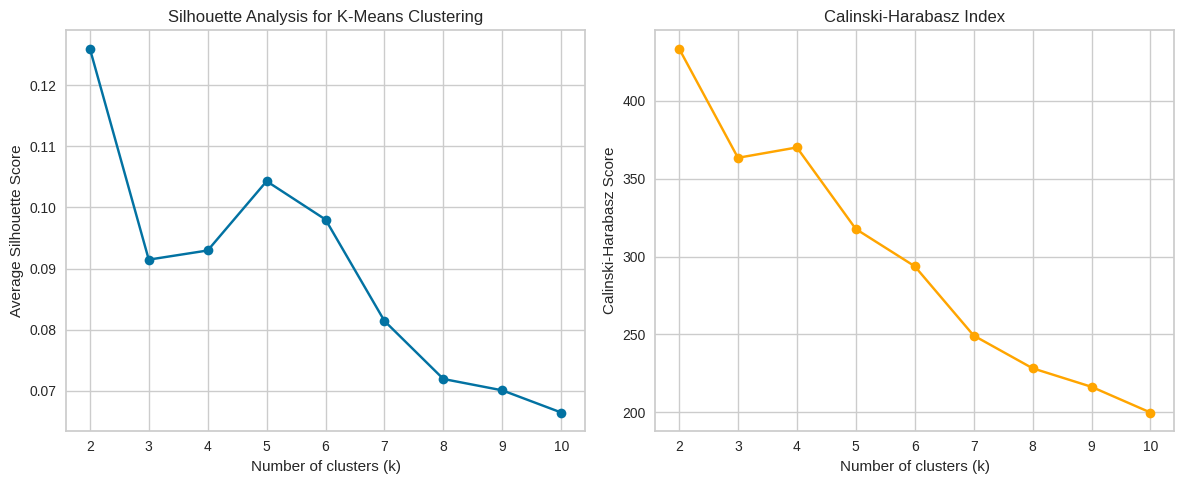

In [ ]:
# Plot the results
plt.figure(figsize=(12, 5))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')

# Calinski-Harabasz Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

The highest average Silhouette score is 0.12599557537154973 with k=2.

The second highest average Silhouette score is 0.1042966445238377 with k=5.

The highest Calinski-Harabasz score is 433.6893749551916 with k=2.

The second highest Calinski-Harabasz is 370.1212260951766 with k=4.

as you can see above We found that the optimal number of clusters (k) maximizing the average Silhouette coefficient and Calinski-Harabasz score is 2.

**The Elbow method**
The Elbow method is a technique used to determine the optimal number of clusters in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (inertia) as a function of the number of clusters. The inertia measures the compactness of the clusters, and the Elbow point represents the number of clusters where adding more clusters does not significantly reduce the inertia. The Elbow method helps in finding a balance between having a low inertia and avoiding overfitting.

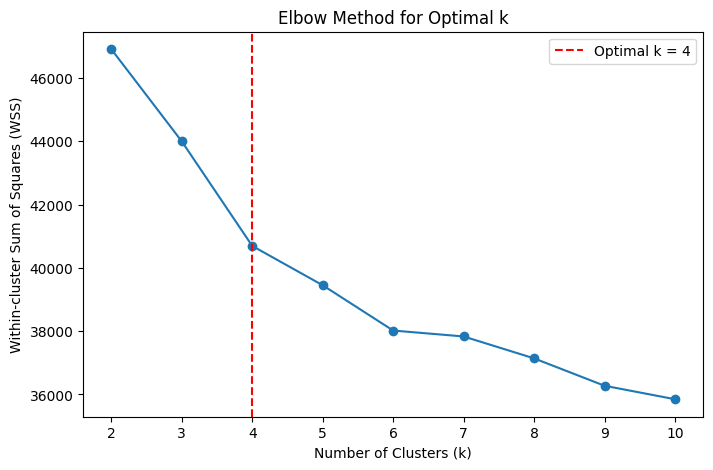

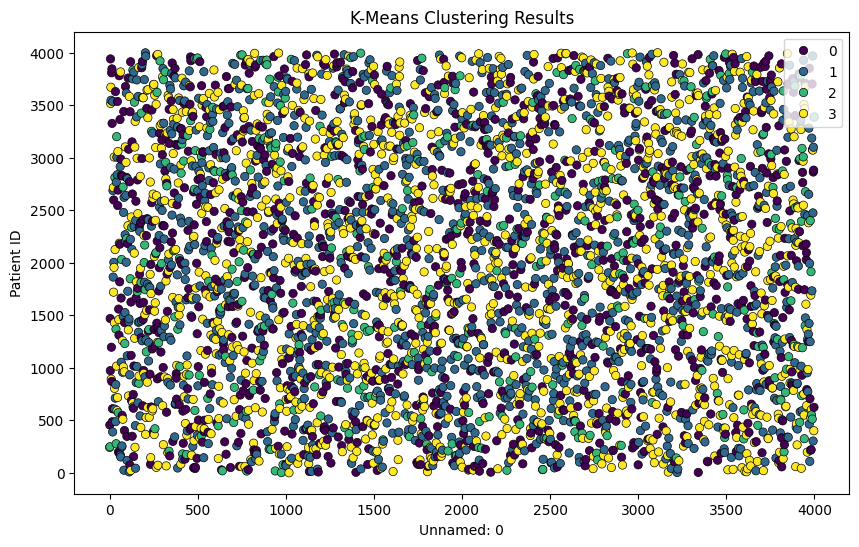

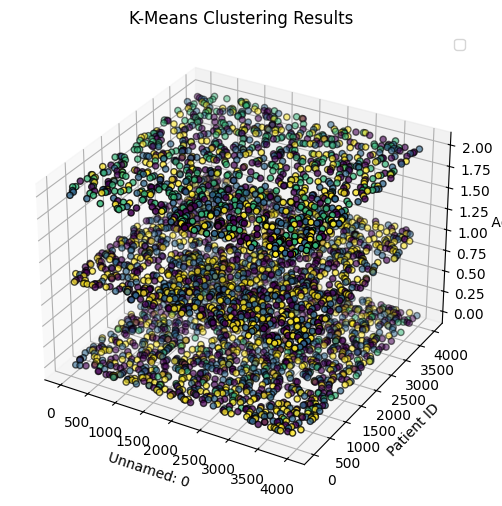

In [ ]:
# Elbow Method for optimal K
plt.figure(figsize=(8, 5))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.axvline(x=4, linestyle='--', color='red', label='Optimal k = 4')
plt.legend()
plt.show()

# Fit KMeans with the optimal K (k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize clustering using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', edgecolor='k')
plt.title("K-Means Clustering Results")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()


# Visualize clustering using a scatter plot using 3D (for more clarification)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df['Cluster'], cmap='viridis', edgecolor='k')

# Set labels and title
ax.set_title("K-Means Clustering Results")
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])

# Add legend
ax.legend()

# Show the plot
plt.show()

The Elbow Method analysis of the WSS curve points to 4 as the optimal number of clusters for this dataset, as this is the value where the curve starts to plateau and exhibit diminishing returns from adding more clusters.

**K = 2**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-3.58436717e-02  6.01612802e-03 -1.27231635e-03 -1.51578667e+00
  -1.57632283e-02  4.00246276e-03 -2.93915089e-02  1.86235034e-02
  -2.58460570e-02 -2.07502703e-02 -7.88018415e-01  1.20408800e-02
   1.94311610e-02]
 [ 1.56004211e-02 -2.61842960e-03  5.53756633e-04  6.59723442e-01
   6.86070896e-03 -1.74201196e-03  1.27922140e-02 -8.10560086e-03
   1.12491091e-02  9.03124431e-03  3.42973210e-01 -5.24061265e-03
  -8.45712174e-03]]

Cluster Labels:
[1 1 0 ... 1 1 0]


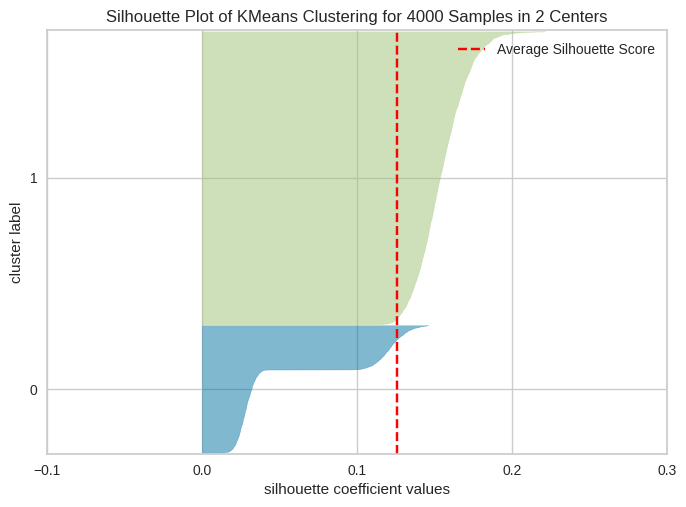

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

**K = 3**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-1.13724978e-02  3.06194502e-03  7.73939314e-01 -1.51578667e+00
   1.02090692e-02  3.07816113e-02  2.63344577e-02  5.65971391e-02
  -4.26801274e-02 -7.94000372e-02 -2.91567962e+00  2.54193889e-02
   8.22772762e-03]
 [-1.66318263e-02  2.36457456e-03 -8.76696074e-02  1.94426626e-01
  -6.89454318e-03 -8.66641061e-03 -4.80994687e-04 -1.41181560e-02
  -1.38890296e-02  2.02785983e-02  3.42973210e-01 -3.36248323e-02
  -8.89490957e-01]
 [ 1.86856519e-02 -2.99066498e-03 -9.42917525e-02  1.62737057e-01
   4.29576540e-03  1.25013262e-03 -5.62395278e-03  5.44932867e-04
   2.32758087e-02 -1.22040640e-03  3.42973210e-01  2.65847844e-02
   8.56815612e-01]]

Cluster Labels:
[2 2 0 ... 1 1 0]


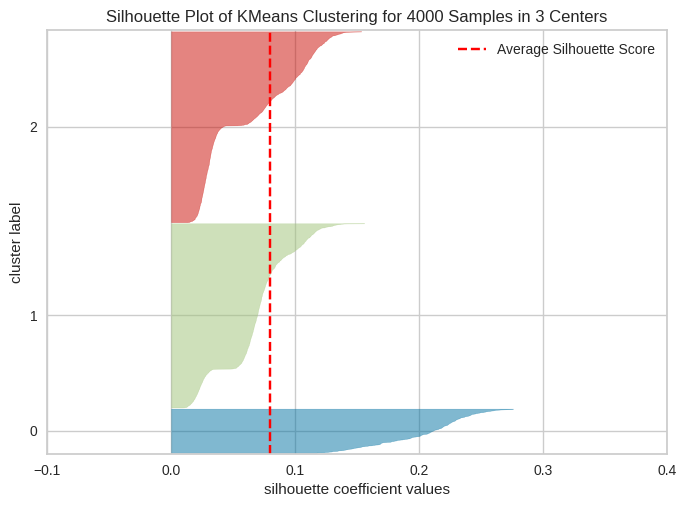

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

**K = 5**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=5
kmeans = KMeans(n_clusters=5, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-4.88517073e-02  7.58647025e-03 -4.13348196e-01 -1.51578667e+00
  -2.95692096e-02 -1.02324129e-02 -5.90135189e-02 -1.56197722e-03
  -1.68976433e-02  1.04259316e-02  3.42973210e-01  4.92932415e-03
   2.53865214e-02]
 [-4.65915921e-02 -2.79201990e-02  2.11131426e-02  6.59723442e-01
   2.53770825e-02 -5.22835461e-02  7.51637909e-04 -6.53391314e-03
   7.26556179e-01  2.24382251e-02  3.42973210e-01 -6.61141503e-02
  -9.00749370e-01]
 [ 3.02392604e-02  1.44252849e-02 -1.25414856e-02  6.59723442e-01
  -9.99944898e-03 -3.36799295e-02  7.31155165e-03 -2.83204925e-02
   7.26556179e-01 -8.68230313e-03  3.42973210e-01  2.99178937e-02
   8.44948891e-01]
 [-1.13724978e-02  3.06194502e-03  7.73939314e-01 -1.51578667e+00
   1.02090692e-02  3.07816113e-02  2.63344577e-02  5.65971391e-02
  -4.26801274e-02 -7.94000372e-02 -2.91567962e+00  2.54193889e-02
   8.22772762e-03]
 [ 6.03056991e-02  4.60966701e-03 -6.06472869e-03  6.59723442e-01
   5.90733246e-03  7.79144148e-02  2.96656108e-02

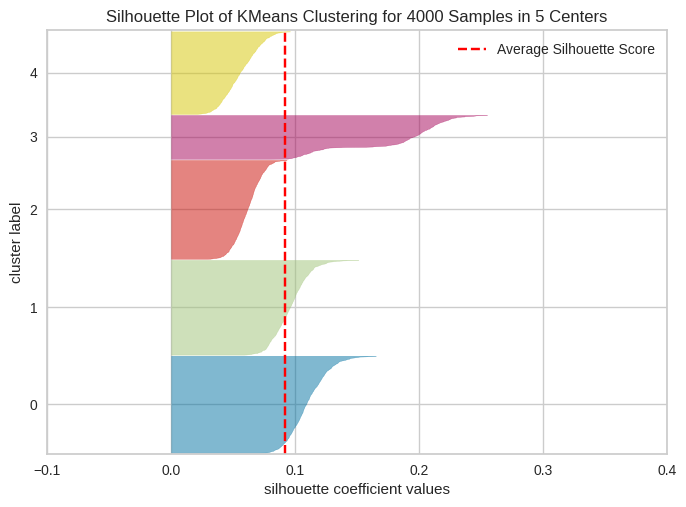

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

                     k=2       k=3       k=5





WSS                46911      43998      39450


---
Silhoutte          0.125      0.091      0.104


In conclusion, we've decided that K=2 is the best choice for our clustering model based on the metrics we've analyzed(WSS, Average Sihouette Score, Visualization of K-mean). du to K=2 being the highest silhouette width, also having the highest value of WSS.
